In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import tools

In [13]:
ASP_PATH="/Users/adehecq/bin/StereoPipeline-3.5.0-alpha-2024-09-04-x86_64-OSX/bin/"

## Coregistering KH-9 MC DEM to reference

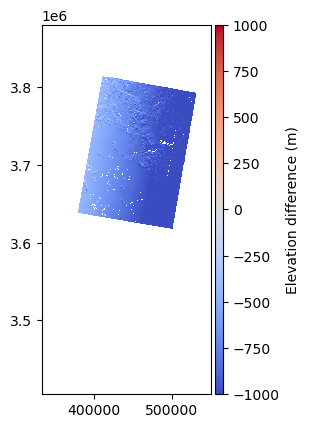

In [8]:
tools.plot_diff("data/data/reference_dem_large.tif", "data/stereo_sub2/DZB1214-500055L004_005-DEM.tif", vmin=-1000, vmax=1000)

In [14]:
tools.dem_coregistration(
    "data/data/reference_dem_large.tif", \
    "data/stereo_sub2/DZB1214-500055L004_005-DEM.tif", \
    "data/stereo_sub2/DZB1214-500055L004_005-DEM_coreg.tif", \
    pc_opts="--save-transformed-source-points --max-displacement 150 \
    --alignment-method similarity-point-to-plane --initial-transform-from-hillshading similarity",
    nthreads=4,
    force=True,
    asp_path=ASP_PATH
    )

+/Users/adehecq/bin/StereoPipeline-3.5.0-alpha-2024-09-04-x86_64-OSX/bin/pc_align data/data/reference_dem_large.tif data/stereo_sub2/DZB1214-500055L004_005-DEM.tif -o /Users/adehecq/work/history/workshop/aspy_tuto/data/stereo_sub2/temp_pc/tmp --save-transformed-source-points --save-transformed-source-points --max-displacement 150     --alignment-method similarity-point-to-plane --initial-transform-from-hillshading similarity --threads 4
	--> Setting number of processing threads to: 4
Writing log info to: /Users/adehecq/work/history/workshop/aspy_tuto/data/stereo_sub2/temp_pc/tmp-log-pc_align-09-10-2322-18501.txt
Will use datum (for CSV files): Geodetic Datum --> Name: North_American_Datum_1983  Spheroid: GRS 1980  Semi-major axis: 6378137  Semi-minor axis: 6356752.3141403561  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=NAD83 +no_defs
/Users/adehecq/bin/StereoPipeline-3.5.0-alpha-2024-09-04-x86_64-OSX/libexec/hillshade --azimuth 300 --elevation 20 --align-to-georef data/da

writing to /Users/adehecq/work/history/workshop/aspy_tuto/data/stereo_sub2/temp_pc/tmp-iterationInfo.csv


Match ratio: 0.75001
Alignment took 157.462 s
Number of errors: 100000
Output: error percentile of smallest errors (meters): 16%: 0.877733, 50%: 2.97819, 84%: 6.59115
Output: mean of smallest errors (meters): 25%: 0.686998, 50%: 1.41897, 75%: 2.28526, 100%: 3.96449
Final error computation took 0.312105 s
Alignment transform (origin is planet center):
     1.00074547989469  0.006594752003119987 -0.001141286116665722     37666.07512519741
  -0.0065927425508598     1.000744651715749  0.001745471133522972    -16254.38976592943
 0.001152745305546981  -0.00173789612248717     1.000765692861291    -9129.674314777367
                    0                     0                     0                     1
Centroid of source points (Cartesian, meters): Vector3(-1948327.7,-4949520.8,3507223.2)
Centroid of source points (lat,lon,z): Vector3(33.5761,-111.48657,-264.69612)

Translation vector (Cartesian, meters): Vector3(-429.97132,-973.47886,-88.391198)
Translation vector (North-East-Down, meters): 

Found 1463 matches


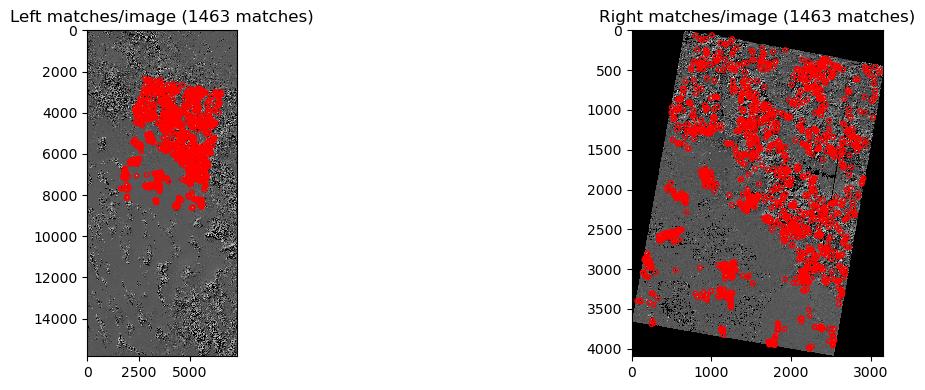

In [15]:
tools.plot_match_file("data/stereo_sub2/temp_pc/tmp-reference_hillshade__source_hillshade.match", \
                      img=["data/stereo_sub2/temp_pc/tmp-reference_hillshade.tif", "data/stereo_sub2/temp_pc/tmp-source_hillshade.tif"])

In [16]:
# !geodiff data/data/reference_dem_large.tif data/stereo_sub2/DZB1214-500055L004_005-DEM.tif -o data/stereo_sub2/DZB1214-500055L004_005-DEM

/usr/local/Caskroom/miniconda/base/envs/aspy/lib/python3.11/site-packages/matplotlib/colors.py:744: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


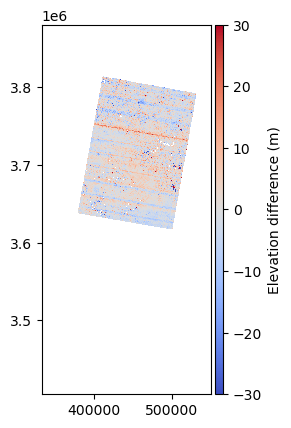

In [19]:
tools.plot_diff("data/data/reference_dem_large.tif", "data/stereo_sub2/DZB1214-500055L004_005-DEM_coreg.tif")

## Applying transform to camera files

In [23]:
!mkdir -p data/camera_models_refined/shifted
!cp data/dense_matches/run-DZB1214-500055L004001_sub2__DZB1214-500055L005001_sub2_unfilt.match \
    data/camera_models_refined/shifted/run-0-1-DZB1214-500055L004001_sub2__DZB1214-500055L005001_sub2.match

In [27]:
!/Users/adehecq/bin/StereoPipeline-3.5.0-alpha-2024-09-04-x86_64-OSX/bin/bundle_adjust \
    -t nadirpinhole --datum WGS84 --inline-adjustments --threads 4\
    --camera-weight 0 --skip-rough-homography --max-iterations 0 \
    --overlap-limit 1 \
    data/data/DZB1214-500055L004001_sub2.tif \
    data/data/DZB1214-500055L005001_sub2.tif \
    data/camera_models_init/DZB1214-500055L004001_sub2_cam.tsai \
    data/camera_models_init/DZB1214-500055L005001_sub2_cam.tsai \
    -o data/camera_models_refined/shifted/run-0-1 \
    --initial-transform data/stereo_sub2/DZB1214-500055L004_005-DEM_coreg_transform.txt \
    --save-cnet-as-csv \
    --remove-outliers-params '50.0 3.0 0.25 2.0'

	--> Setting number of processing threads to: 4
Writing log info to: data/camera_models_refined/shifted/run-0-1-log-bundle_adjust-09-10-2333-18774.txt
Loading camera model: data/data/DZB1214-500055L004001_sub2.tif data/camera_models_init/DZB1214-500055L004001_sub2_cam.tsai
Datum:
Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Reading the alignment transform from: data/stereo_sub2/DZB1214-500055L004_005-DEM_coreg_transform.txt
Initial transform:
Matrix4x4((1.00075,0.00659475,-0.00114129,37666.1)(-0.00659274,1.00074,0.00174547,-16254.4)(0.00115275,-0.0017379,1.00077,-9129.67)(0,0,0,1))
Loading the cameras.
Using session: nadirpinhole
Loading cameras elapsed time: 0.000778 seconds.
Computing statistics for data/data/DZB1214-500055L004001_sub2.tif
Using downsample scale: 24
          stats:  [**************************************************] Comple

## Filter dense tie points with reference elevation + mask

In [28]:
tools.cnet_to_matches("data/camera_models_refined/shifted/run-0-1-cnet.csv", 
                      "data/dense_matches/run", 
                      refDEM="data/data/reference_dem_large.tif")

Elevation filter - Keeping 9986/10000 valid points
Saving 9986 points in file data/dense_matches/run-DZB1214-500055L004001_sub2__DZB1214-500055L005001_sub2.match


Found 9986 matches - plotting only 9986


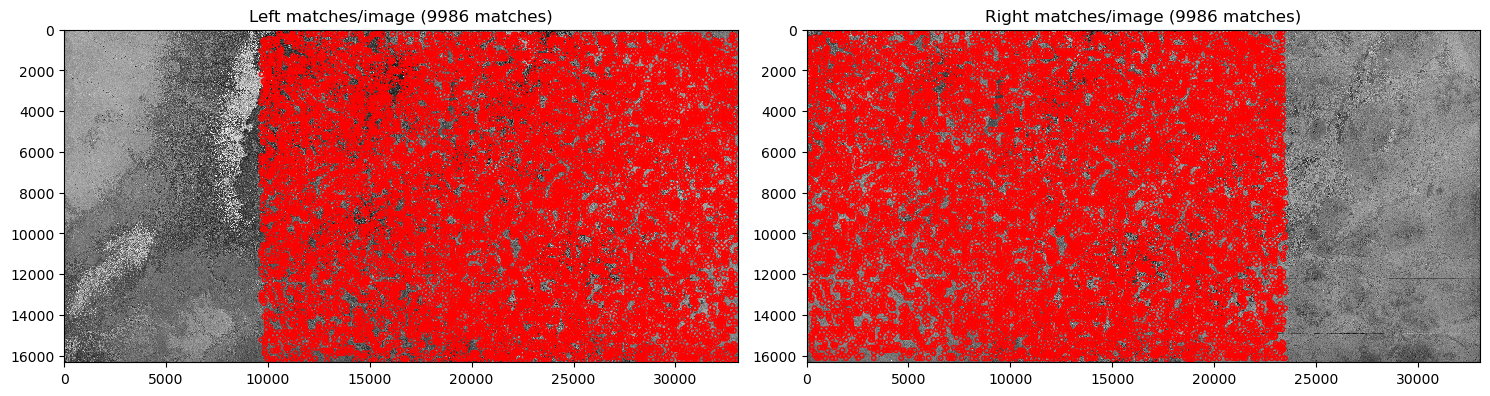

In [30]:
tools.plot_match_file("data/dense_matches/run-DZB1214-500055L004001_sub2__DZB1214-500055L005001_sub2.match", \
                      img=["data/data/DZB1214-500055L004001_sub2.tif", "data/data/DZB1214-500055L005001_sub2.tif"])

## Second bundle adjustment

In [35]:
!mkdir data/camera_models_refined/ba_extr/
!cp data/dense_matches/run-DZB1214-500055L004001_sub2__DZB1214-500055L005001_sub2.match \
    data/camera_models_refined/ba_extr/run-DZB1214-500055L004001_sub2__DZB1214-500055L005001_sub2.match

In [38]:
!/Users/adehecq/bin/StereoPipeline-3.5.0-alpha-2024-09-04-x86_64-OSX/bin/bundle_adjust \
    -t nadirpinhole --datum WGS84 --inline-adjustments --camera-weight 0 --skip-rough-homography --threads 4 \
    --max-iterations 30 --num-passes 3 --ip-num-ransac-iterations 500000 --overlap-limit 1 \
    data/data/DZB1214-500055L004001_sub2.tif \
    data/data/DZB1214-500055L005001_sub2.tif \
    data/camera_models_refined/shifted/run-0-1-DZB1214-500055L004001_sub2_cam.tsai \
    data/camera_models_refined/shifted/run-0-1-DZB1214-500055L005001_sub2_cam.tsai \
    -o data/camera_models_refined/ba_extr/run  \
    --heights-from-dem data/data/reference_dem_large_masked.tif --heights-from-dem-uncertainty 100

	--> Setting number of processing threads to: 4
Writing log info to: data/camera_models_refined/ba_extr/run-log-bundle_adjust-09-10-2340-18942.txt
Loading camera model: data/data/DZB1214-500055L004001_sub2.tif data/camera_models_refined/shifted/run-0-1-DZB1214-500055L004001_sub2_cam.tsai
Datum:
Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Loading the cameras.
Using session: nadirpinhole
Loading cameras elapsed time: 0.000682 seconds.
Computing statistics for data/data/DZB1214-500055L004001_sub2.tif
Using downsample scale: 24
          stats:  [**************************************************] Complete!
	    Writing stats file: data/camera_models_refined/ba_extr/run-DZB1214-500055L004001_sub2-stats.tif
	    data/data/DZB1214-500055L004001_sub2.tif: [ lo: 0 hi: 255 mean: 112.669 std_dev: 44.6485 ]
Computing statistics for data/data/DZB1214-5000

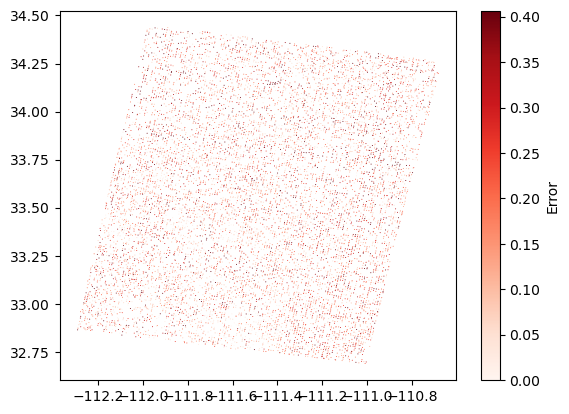

In [40]:
tools.plot_ba_outputs("data/camera_models_refined/ba_extr/run-initial_residuals_pointmap.csv")

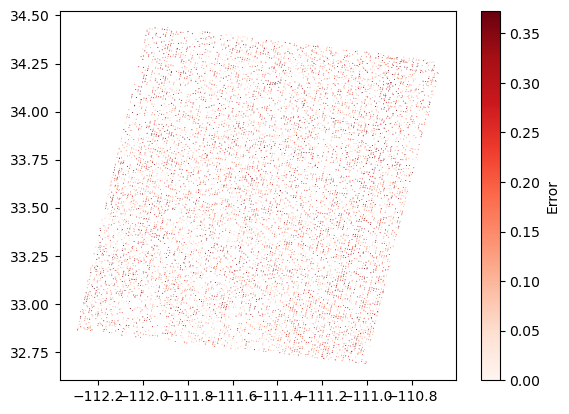

In [41]:
tools.plot_ba_outputs("data/camera_models_refined/ba_extr/run-final_residuals_pointmap.csv")

## Possibly a third bundle adjustment for intrinsics...